<a href="https://colab.research.google.com/github/morgan-nutto/morgan-nutto/blob/main/Copy_of_Project1_DONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#To perform agglomerative clustering and visualize the dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [2]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading data into a pandas dataframe
df = pd.read_csv("/content/drive/MyDrive/MIT-WK3-Unstructured_data/Customer_Personality_Segmentation.csv", sep="\t")
data = df.copy()

## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [4]:
# check data shape
data.shape

(2240, 29)

* The data set has 2240 rows and 29 columns

In [5]:
#check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### **Observations:** There are 2240 rows, and 29 columns.
Education, Marital_status, and Dt_Customer are categorical, the rest are numerical

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [6]:
# Write your code here
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2240.0,NaN,NaN,NaN,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,11.984069,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.0,NaN,NaN,NaN,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,NaN,NaN,NaN,0.50625,0.544538,0.0,0.0,0.0,1.0,2.0
Dt_Customer,2240,663,31-08-2012,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.0,NaN,NaN,NaN,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,NaN,NaN,NaN,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0


##### **Observations:** Average household income is around 52,247 with a standard deviation of 25,173

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [7]:
# check for null values
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


##### **Observations:** Income has 24 missing values

In [8]:
#lets take a look at averages income for other education and marital status to determine best course of action for null values
display(data.groupby(['Marital_Status', 'Education'])['Income'].mean())

Marital_Status  Education 
Absurd          Graduation    79244.000000
                Master        65487.000000
Alone           Graduation    34176.000000
                Master        61331.000000
                PhD           35860.000000
Divorced        2n Cycle      49395.130435
                Basic          9548.000000
                Graduation    54526.042017
                Master        50331.945946
                PhD           53096.615385
Married         2n Cycle      46201.100000
                Basic         21960.500000
                Graduation    50800.258741
                Master        53286.028986
                PhD           58138.031579
Single          2n Cycle      53673.944444
                Basic         18238.666667
                Graduation    51322.182927
                Master        53530.560000
                PhD           53314.614583
Together        2n Cycle      44736.410714
                Basic         21240.071429
                Graduation    55758.480702
                Master        52109.009804
                PhD           56041.422414
Widow           2n Cycle      51392.200000
                Basic         22123.000000
                Graduation    54976.657143
                Master        58401.545455
                PhD           60288.083333
YOLO            PhD           48432.000000
Name: Income, dtype: float64

In [9]:
#Change 'alone' to 'single' and drop 'absurd' and 'YOLO' since it's hard to know what the true marital status is.

# Change 'Alone' to 'Single'
data.loc[data['Marital_Status'] == 'Alone', 'Marital_Status'] = 'Single'

# Filter out rows with 'Absurd' and 'YOLO' marital statuses
data = data[~data['Marital_Status'].isin(['Absurd', 'YOLO'])]
data.reset_index(drop = True, inplace = True)

# Fill null values in 'Income' with the average income for the same education and marital status
data['Income'] = data['Income'].fillna(data.groupby(['Marital_Status', 'Education'])['Income'].transform('mean'))

# Display the value counts to confirm changes
display(data['Marital_Status'].value_counts())

# recheck for null values
display(data.isnull().sum())


,count
Marital_Status,
Married,864
Together,580
Single,483
Divorced,232
Widow,77


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


#### **Question 4**: Are there any duplicates in the data?

In [10]:
# check for duplicates
data.duplicated().sum()


np.int64(0)

##### **Observations:** There are no duplicates in the data

In [11]:
#check the number of unique values in each column
data.nunique()

,0
ID,2236
Year_Birth,59
Education,5
Marital_Status,5
Income,1984
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


* Since Z_Revenue and Z_CostContact only have 1 unique value, we can safetly drop those columns as they aren't important for analysis or clustering.
we can also drop 'ID' since each entry has a unique value.

In [12]:
#Drop Z_Revenue, Z_CostContact, ID
data.drop(['Z_Revenue', 'Z_CostContact', 'ID'], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2236 non-null   int64  
 1   Education            2236 non-null   object 
 2   Marital_Status       2236 non-null   object 
 3   Income               2236 non-null   float64
 4   Kidhome              2236 non-null   int64  
 5   Teenhome             2236 non-null   int64  
 6   Dt_Customer          2236 non-null   object 
 7   Recency              2236 non-null   int64  
 8   MntWines             2236 non-null   int64  
 9   MntFruits            2236 non-null   int64  
 10  MntMeatProducts      2236 non-null   int64  
 11  MntFishProducts      2236 non-null   int64  
 12  MntSweetProducts     2236 non-null   int64  
 13  MntGoldProds         2236 non-null   int64  
 14  NumDealsPurchases    2236 non-null   int64  
 15  NumWebPurchases      2236 non-null   i

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

In [13]:
#create a function that plots continuous variables using histplot and boxplot
def hist_box(df, col, figsize=(15, 5), kde = False, bins = None):
  #create sub plots; one histogram, one box plot
  fig, (box, hist) = plt.subplots(
      nrows = 2,
      sharex = True, # both sub plots share x axis
      gridspec_kw ={"height_ratios": (0.25, 0.75)},
      figsize = figsize
  )

  sns.boxplot(data = df, x = col, ax = box, showmeans = True, color = 'violet') # Draw boxplot
  sns.histplot(data = df, x = col, kde = kde, ax = hist)               # draw histogram
  hist.axvline(data[col].mean(), color = "green", linestyle = "--")   # Marks mean of data
  hist.axvline(data[col].median(), color = "black", linestyle = "-")  # Marks median of data


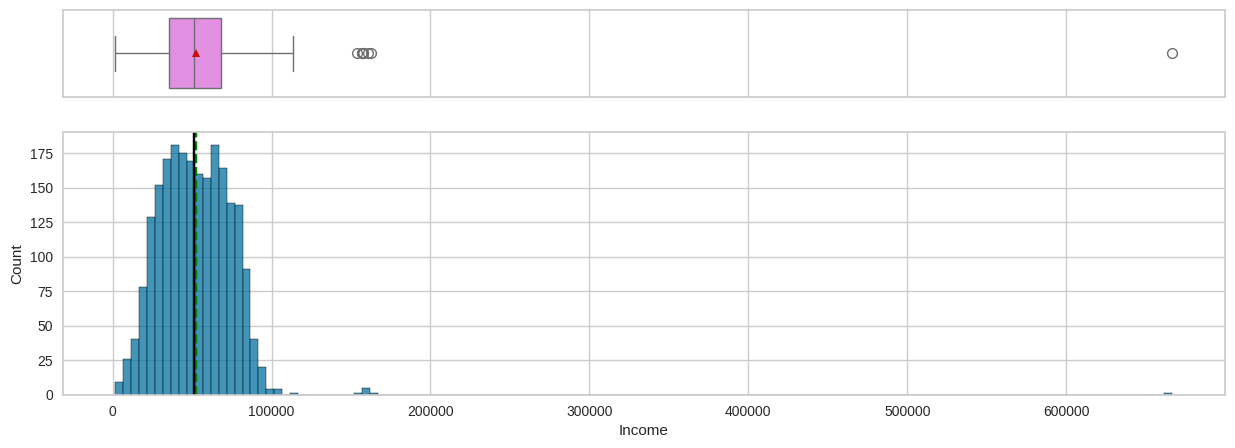

In [14]:
hist_box(data, 'Income')

**bold text**

*   Income is heavily right-skewed, with most people earning less than $100,000 a year

*   Theres atleast one extreme outlier greater than $600,000






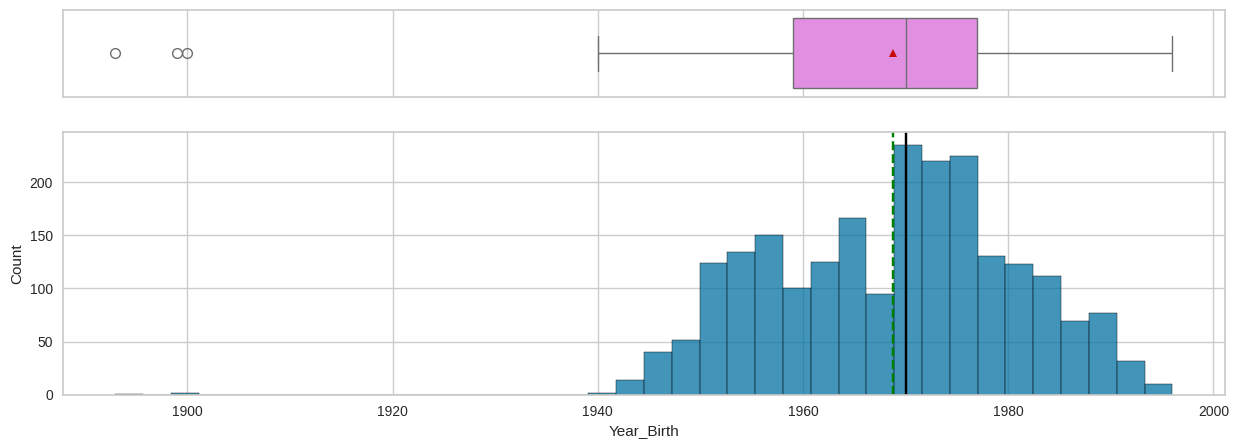

In [15]:
hist_box(data, 'Year_Birth')

* Birth Year is left-skewed, with ~50% of people being born after 1970

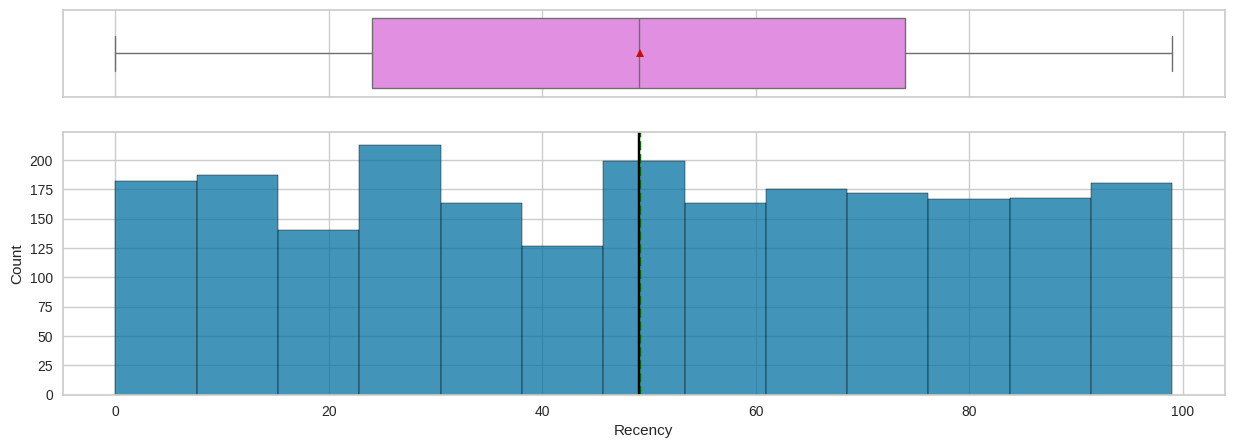

In [16]:
hist_box(data, 'Recency')

* Recency is a uniform distribution

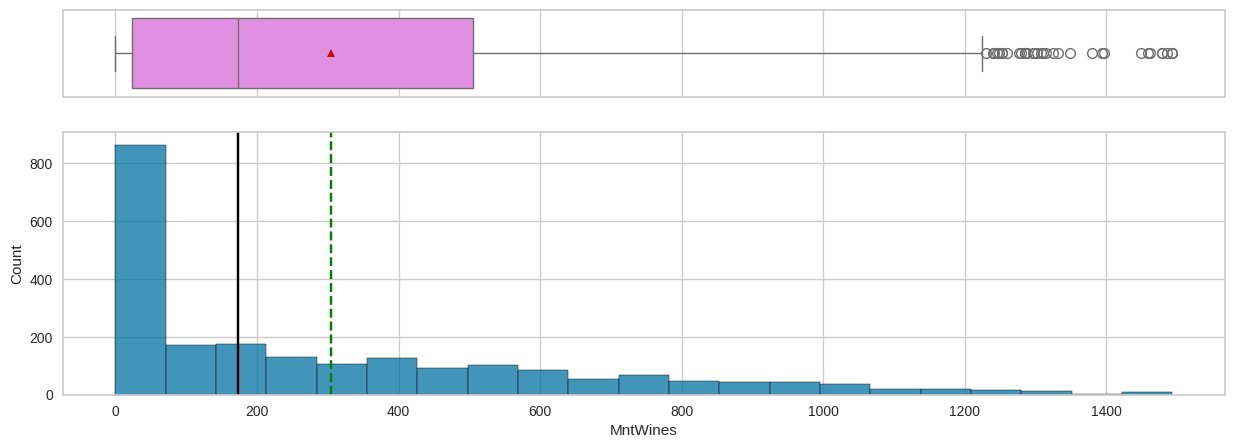

In [17]:
hist_box(data, 'MntWines')

* The amount spent on wine is right-skewed, with ~50% of people spending < $200

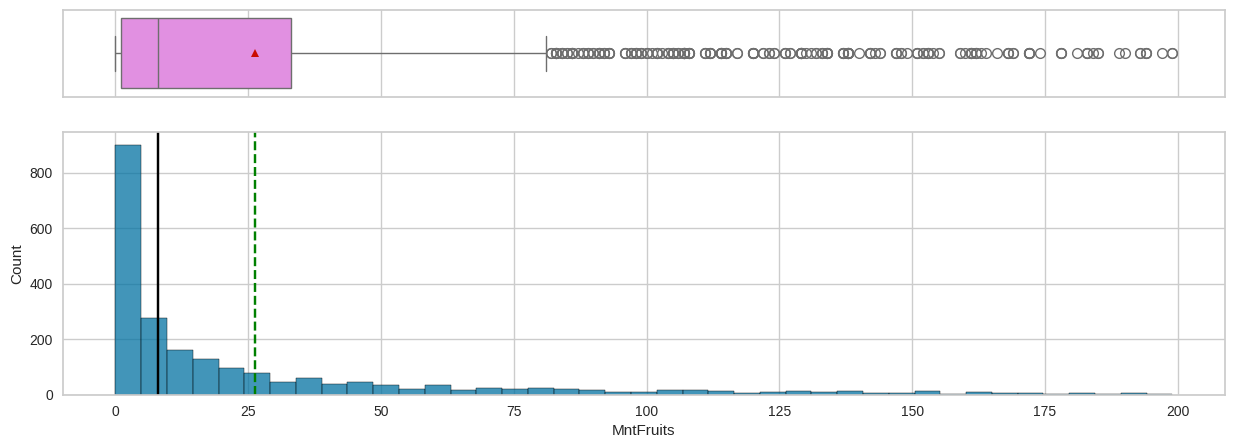

In [18]:
hist_box(data, 'MntFruits')

* The amount spent on fruit is right-skewed with few people spending > $50

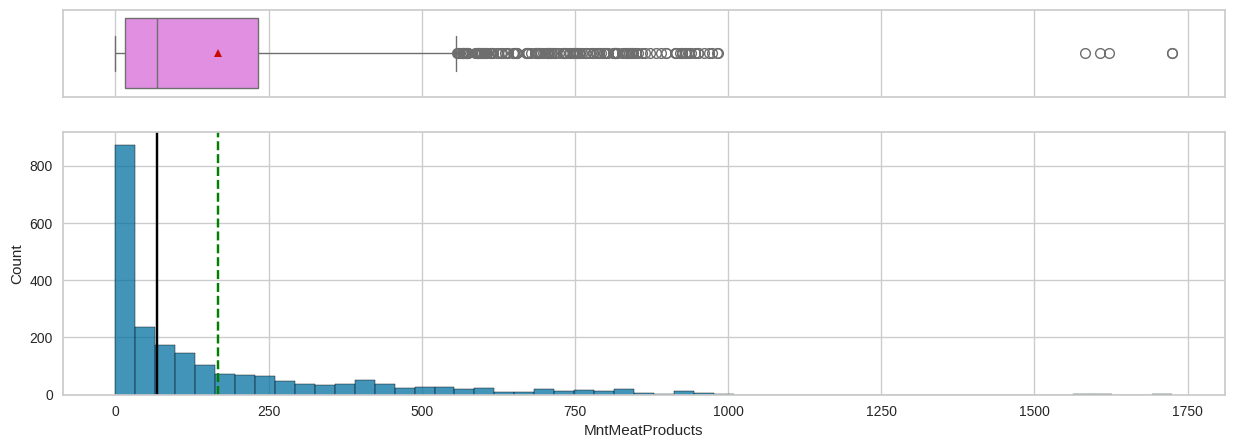

In [19]:
hist_box(data, 'MntMeatProducts')

* The amount spent on meat is right-skewed, with few people spending > $500

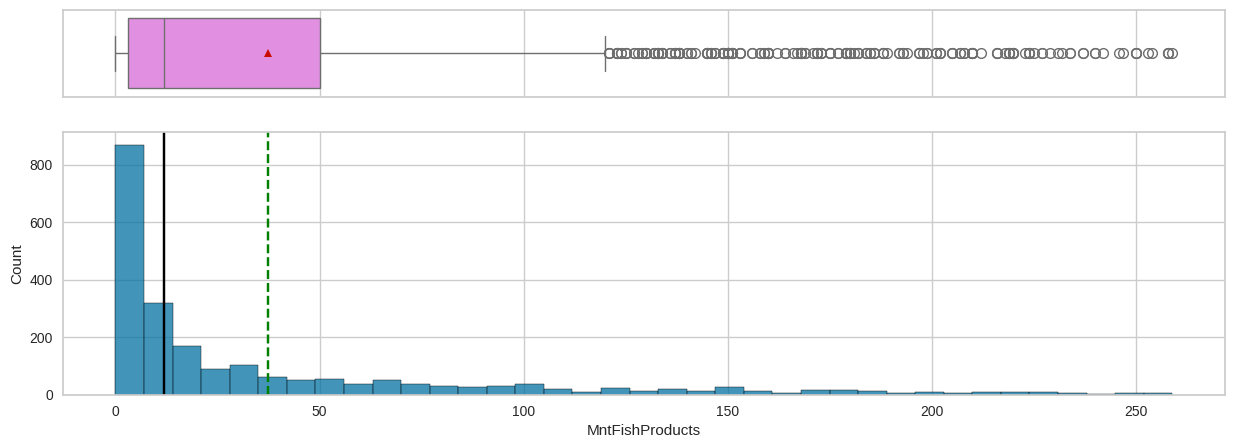

In [20]:
hist_box(data, 'MntFishProducts')

* The amount spent on Fish is right-skewed, with few people spending > $150

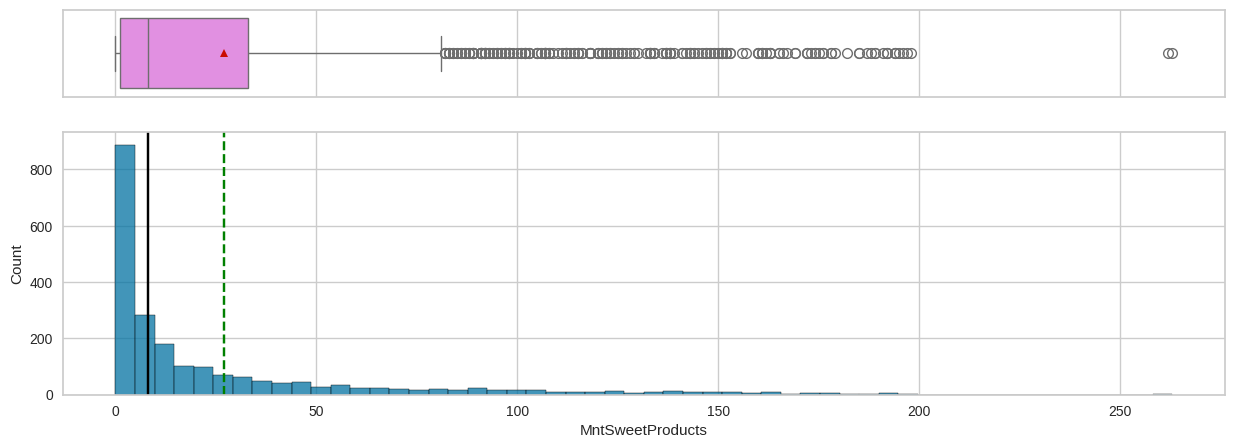

In [21]:
hist_box(data, 'MntSweetProducts')

* The amount spent on sweet products is right-skewed, with few people spending > $100

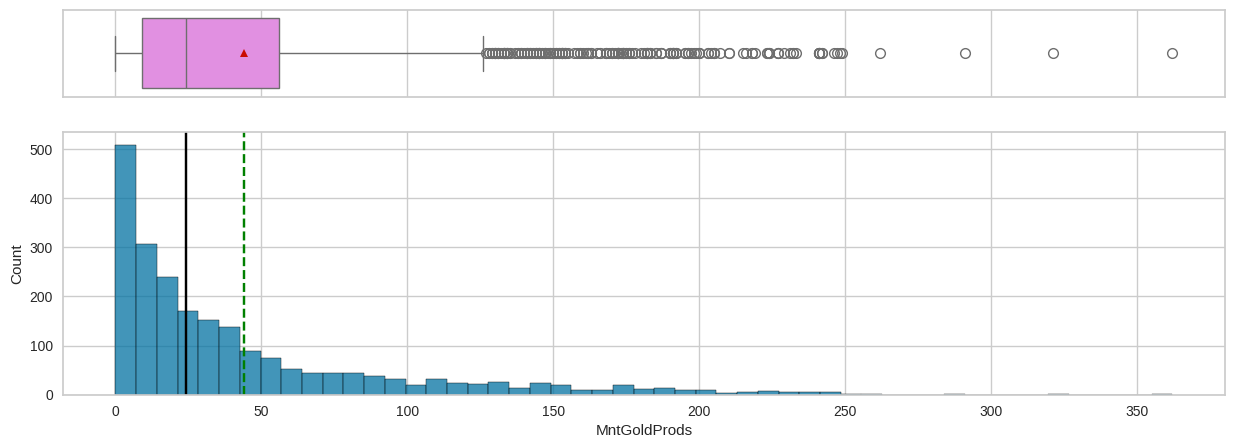

In [22]:
hist_box(data, 'MntGoldProds')

*The amount spent on gold products is right-skewed, with few people spending > $200

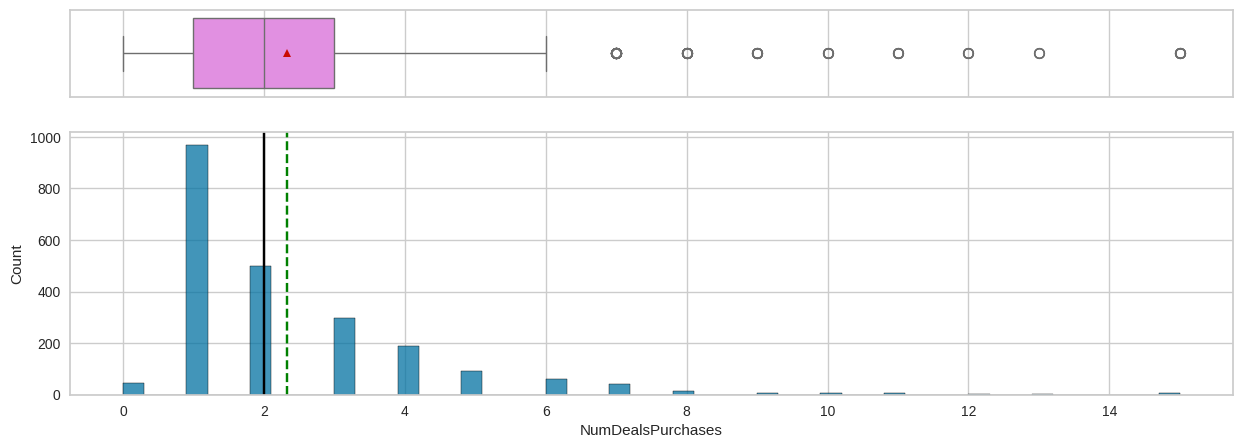

In [23]:
hist_box(data, 'NumDealsPurchases')

* The number of purchases made with deals is right-skewed with ~50% of people making <= 2 purchases

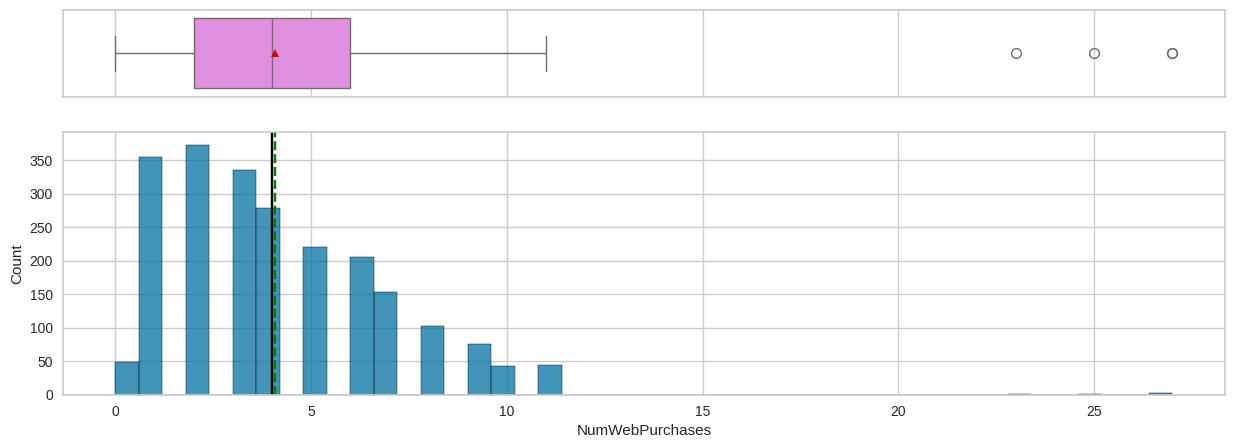

In [24]:
hist_box(data, 'NumWebPurchases')

* The number of web purchases is right-skewed, with ~50% of people making < 5 purchases

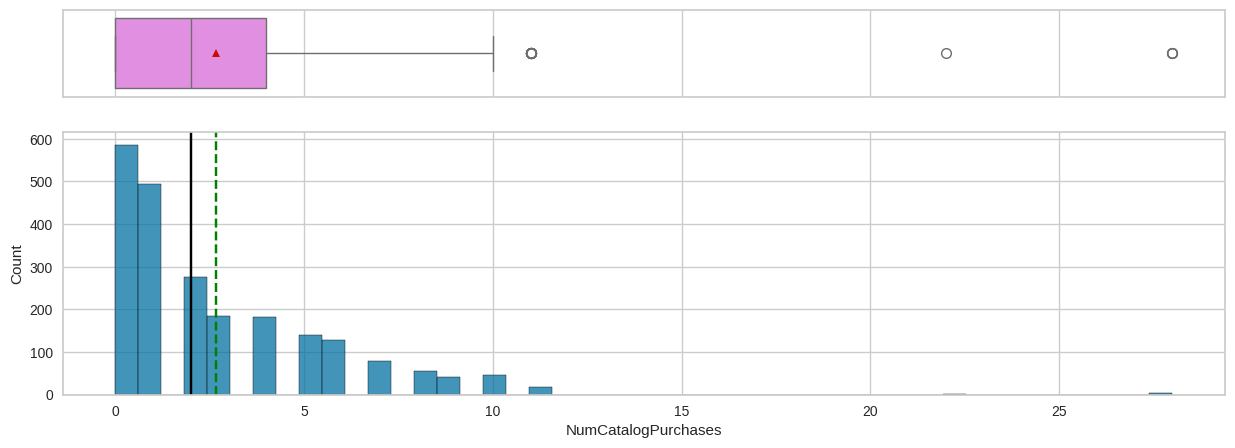

In [25]:
hist_box(data, 'NumCatalogPurchases')

* The number of catalog purchases are right-skewed with ~50% of people making < 4 purchases

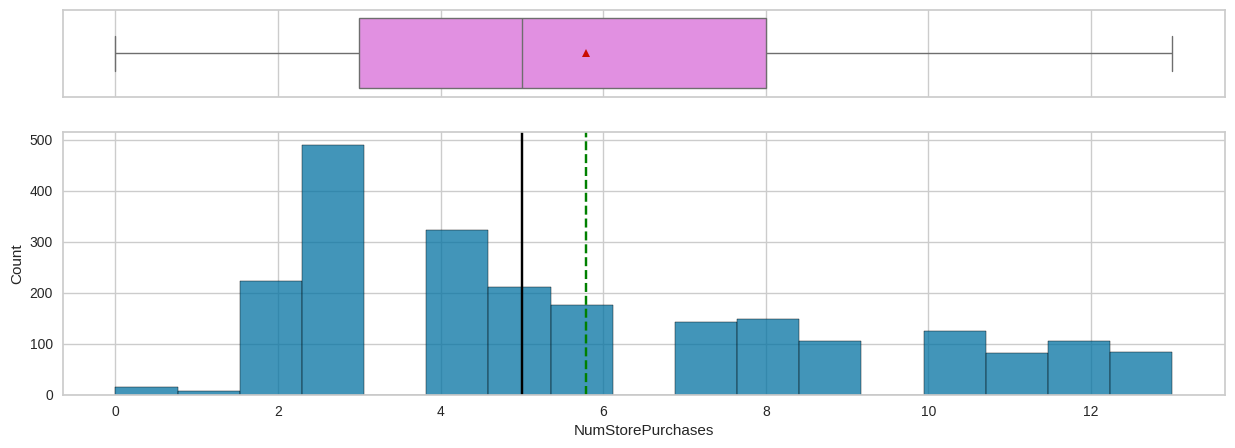

In [26]:
hist_box(data, 'NumStorePurchases')

* Number of store purchases is slightly right-skewed with ~50% of people making <=5 purchases

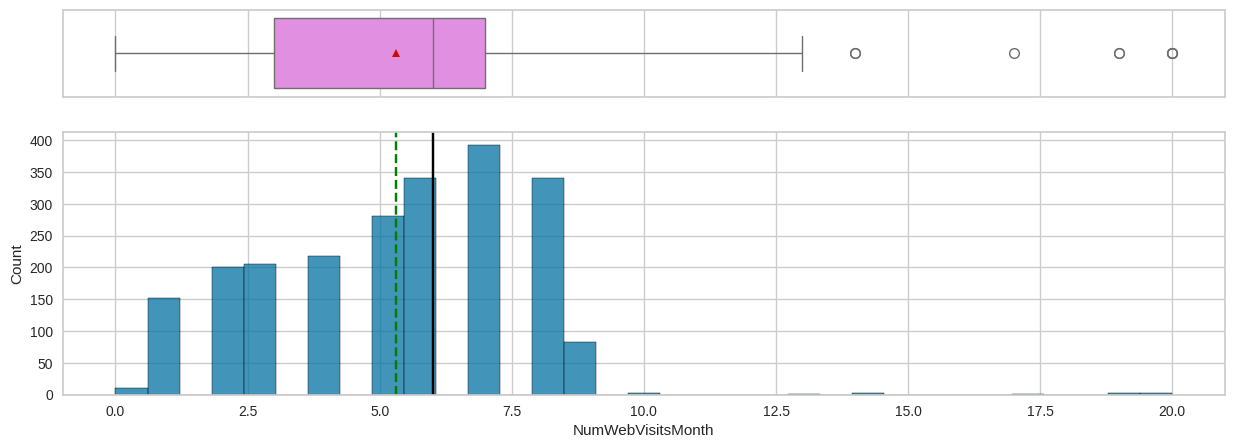

In [27]:
hist_box(data, 'NumWebVisitsMonth')

* Number of web visits is right-skewed with ~50% of people making < 6 visits a month

In [28]:
#make a function to plot categorical variables using bar plot

def bar_plot(data, col, perc = False, n = None):

    total = len(data[col])  # Length of the column
    count = data[col].nunique()
    if n is None:           # determine width of figure
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = col,
        palette = "Paired",
        order = data[col].value_counts().index[:n].sort_values(),
    )    #customize axis

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                       # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot







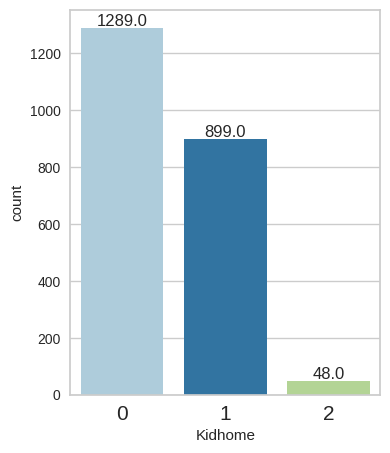

In [29]:
bar_plot(data,'Kidhome' )

* Most people have 0 or 1 kid in the home

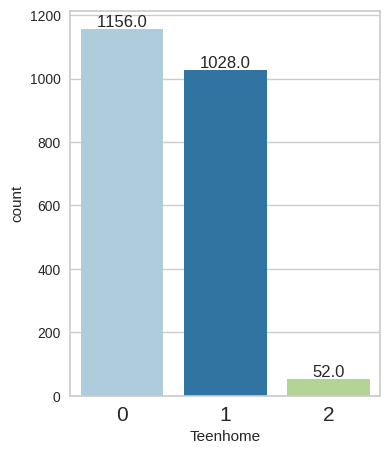

In [30]:
bar_plot(data, 'Teenhome')

* Most people have 0 or 1 teen at home

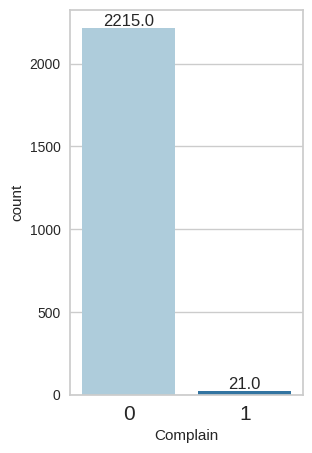

In [31]:
bar_plot(data,'Complain' )

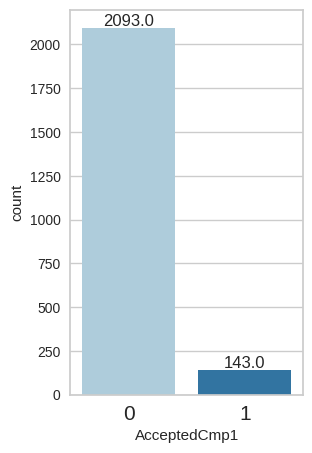

In [32]:
bar_plot(data, 'AcceptedCmp1')

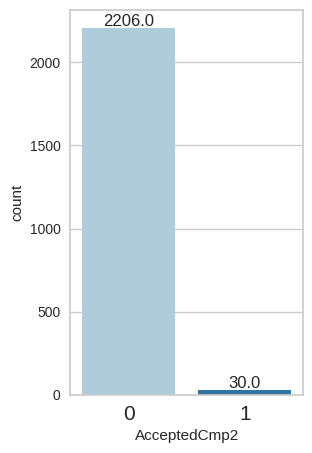

In [33]:
bar_plot(data,'AcceptedCmp2' )

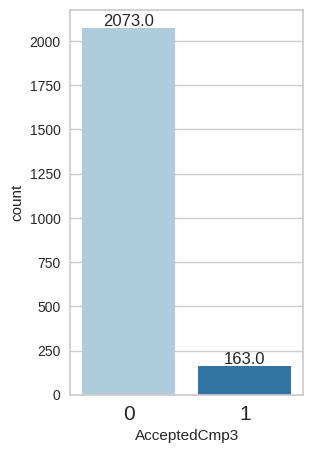

In [34]:
bar_plot(data, 'AcceptedCmp3')

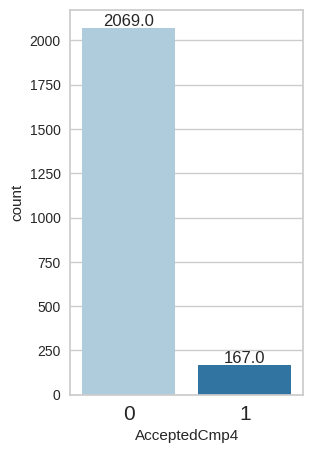

In [35]:
bar_plot(data,'AcceptedCmp4' )

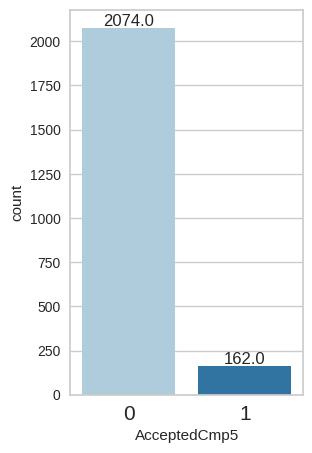

In [36]:
bar_plot(data,'AcceptedCmp5' )

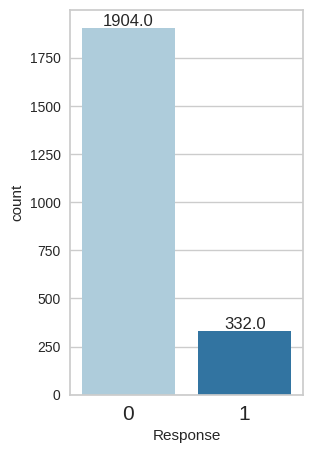

In [37]:
bar_plot(data,'Response' )

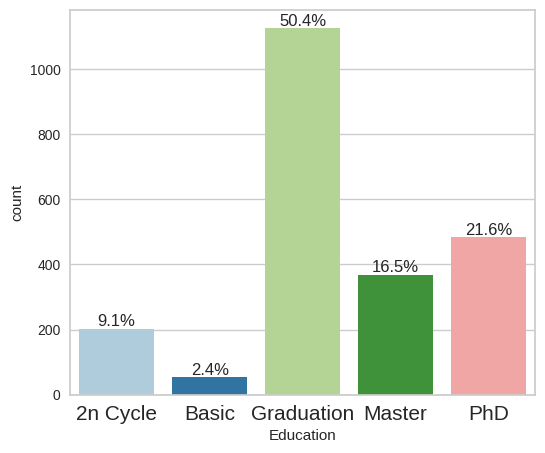

In [38]:
bar_plot(data,'Education', perc = True )

* ~50% of people have graduated a 4-year college

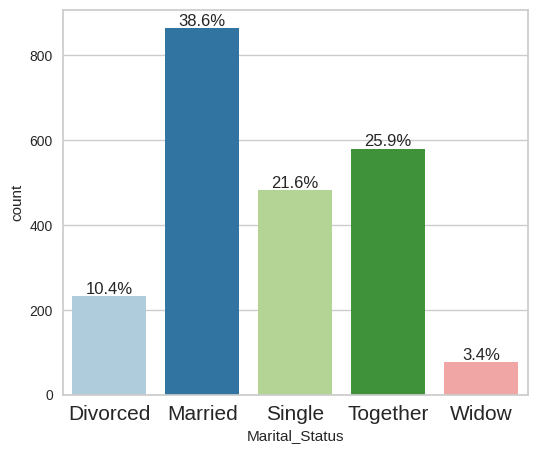

In [39]:
bar_plot(data,'Marital_Status', perc = True)

over 50% of people are either married or have a significant other

##### **Observations:** Few people have complained, and most people do not respond to campaigns, though the most recent('response') saw the most responses out of all campaigns
There are also some extreme outliers in columns such as birth year, and income that may be mistakes and should be handled before further analysis

In [40]:
#look at extreme Income outlier

data.loc[data['Income']> 600000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2229,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0


,2229
Year_Birth,1977
Education,Graduation
Marital_Status,Together
Income,117470.625
Kidhome,1
Teenhome,0
Dt_Customer,02-06-2013
Recency,23
MntWines,9
MntFruits,14


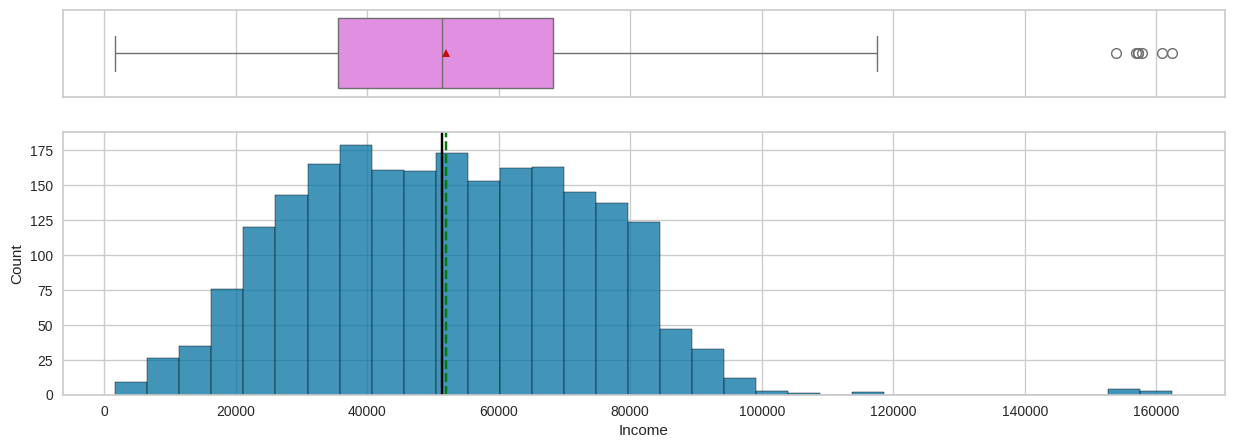

In [41]:
#replace value with the right whisker value for income to ensure our data isn't influenced by such an extreme outlier
IQR = data['Income'].quantile(.75) - data['Income'].quantile(.25)
max_whisker = data['Income'].quantile(.75) + 1.5 * IQR # Calculate the upper whisker

# Find the index of the maximum income value
max_income_index = data['Income'].idxmax()

# Replace the income value at the index of the maximum income with the max_whisker value
data.loc[max_income_index, 'Income'] = max_whisker

# display the row that was changed to confirm
display(data.loc[max_income_index])
#revisualize the histogram
hist_box(data, 'Income')

In [42]:
#look at extreme outliers for Year_Birth

data.loc[data['Year_Birth'] < 1920]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
192,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
239,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0


#####**Observations:** These Year_Birth and Dt_Customer pairs would make these customers over 110 years old, which is highly unlikely.

In [43]:
#drop extreme outliers to optimize clustering algorithm
data = data.drop(index = [192, 239,339], axis = 0)
data.reset_index(drop = True, inplace = True)



In [44]:
# Convert 'Dt_Customer' to datetime objects
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst = True)

# Display the data types after conversion
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2233 non-null   int64         
 1   Education            2233 non-null   object        
 2   Marital_Status       2233 non-null   object        
 3   Income               2233 non-null   float64       
 4   Kidhome              2233 non-null   int64         
 5   Teenhome             2233 non-null   int64         
 6   Dt_Customer          2233 non-null   datetime64[ns]
 7   Recency              2233 non-null   int64         
 8   MntWines             2233 non-null   int64         
 9   MntFruits            2233 non-null   int64         
 10  MntMeatProducts      2233 non-null   int64         
 11  MntFishProducts      2233 non-null   int64         
 12  MntSweetProducts     2233 non-null   int64         
 13  MntGoldProds         2233 non-nul

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


### Feature Engineering

In [45]:
#Create a column that represents customer age (Assume current year is 2014)
data['Age'] = 2014 - data['Year_Birth']

#Drop year_birth
data.drop('Year_Birth', axis = 1, inplace = True)

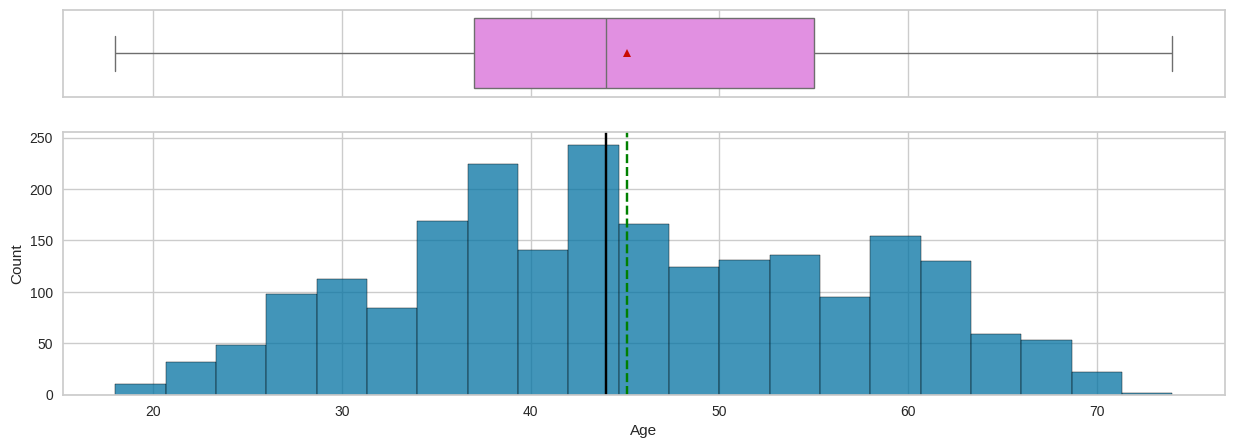

In [46]:
hist_box(data, 'Age')

In [47]:
#Create a column that sums the total amount of purchases
data['Total_Purchases'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

#drop Individual Purchase categories
data.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis = 1, inplace = True)

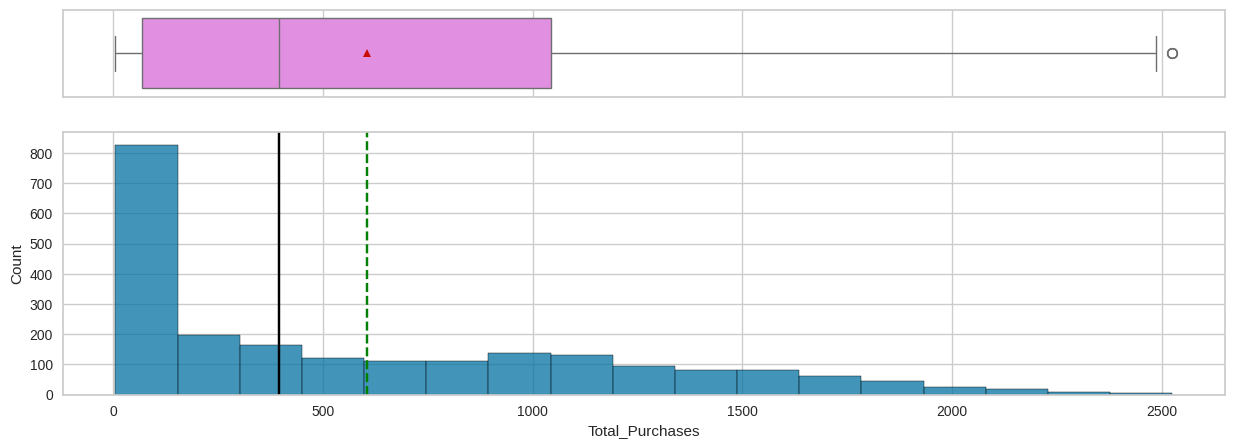

In [48]:
hist_box(data, 'Total_Purchases')

In [49]:
#Create a column that sums the total number of purchases
data['Total_Purchases_Count'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']


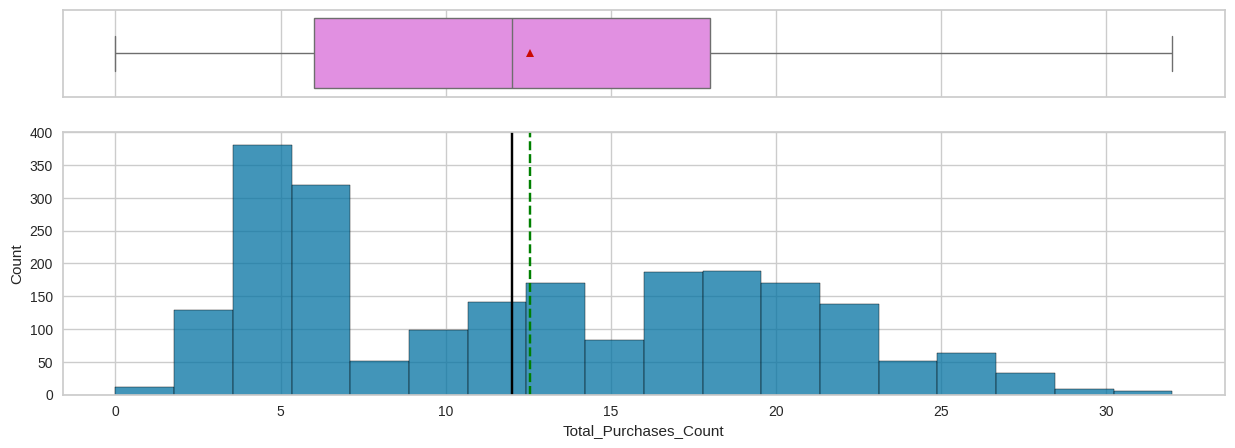

In [50]:
hist_box(data, 'Total_Purchases_Count')

- Keep purchase channels as they are a key behavioral dimension that would help with providing powerful insights on their own

### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

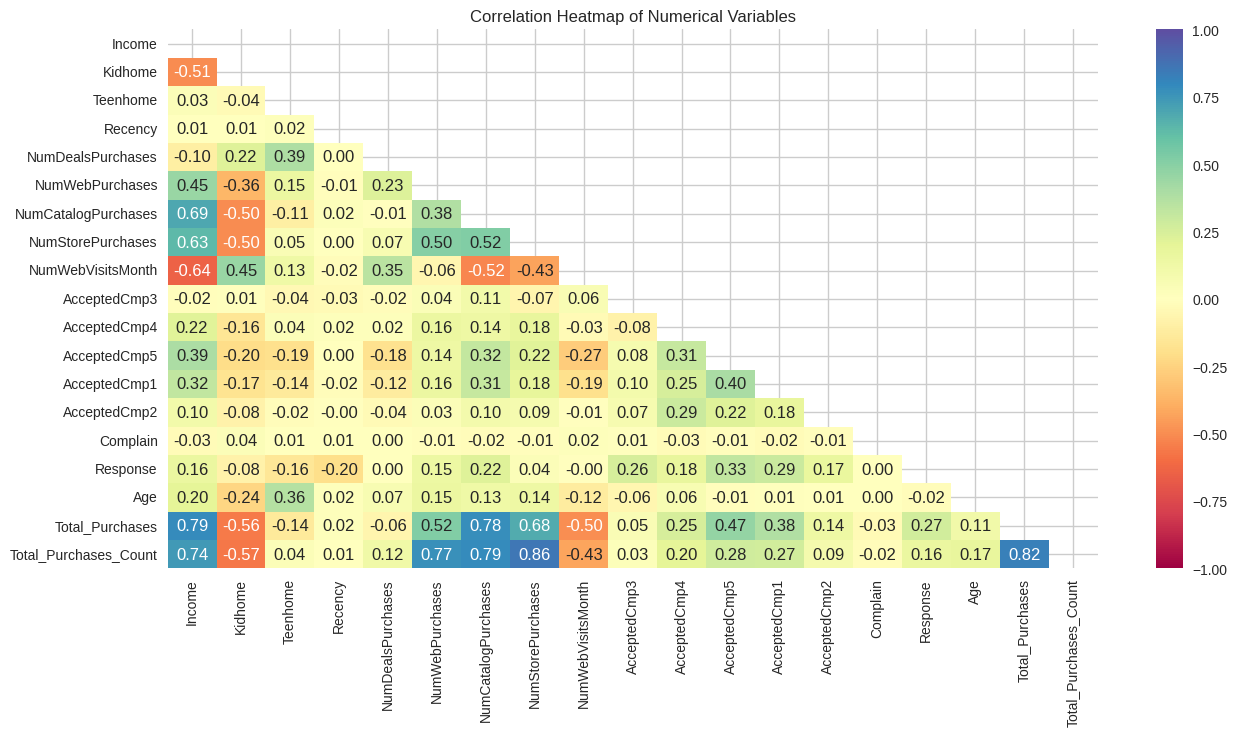

In [51]:
#use heatmap to find correlations between variables
cols = data.select_dtypes(include = np.number).columns.tolist()
# Get the correlation matrix
correlation_matrix = data[cols].corr(numeric_only=True)

# Calculate and plot the correlation heatmap
plt.figure(figsize=(15, 7))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # Create a mask for the upper triangle
sns.heatmap(correlation_matrix, annot=True, vmin = -1, vmax = 1, fmt = '.2f', cmap='Spectral', mask=mask) # Apply the mask
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

#####**Observations:**
* Notable positive correlations are between {Income, NumCatalogPurchases},{Income, NumStorePurchases}
* Notable Negative correlation is between {Income, NumWebVisitsMonth}

- As expected, theres high positive correlation between Total overall purchases and features like Income, Num of purchases across all mediums.
- Theres also a strong negative correlation between Total overall purchases and kids at home- to be further analyzed

In [52]:
# Extract unique values greater than 0.60 (absolute value) from the lower triangle
high_correlation_values = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.60:
            high_correlation_values.append((correlation_matrix.columns[i], correlation_matrix.index[j], correlation_matrix.iloc[i, j]))

# Convert the list to a tuple
high_correlation_tuple = tuple(high_correlation_values)

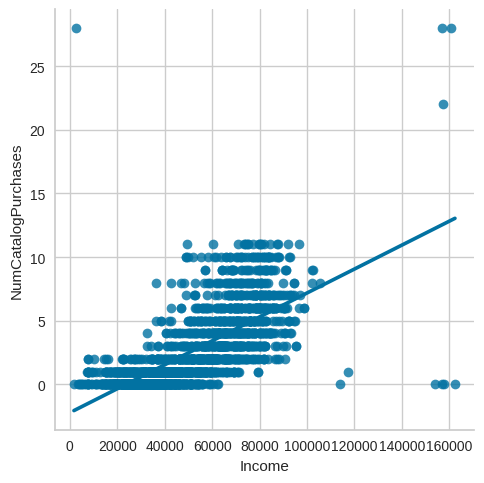

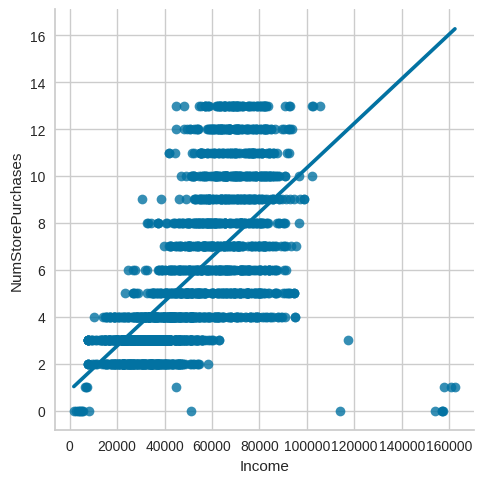

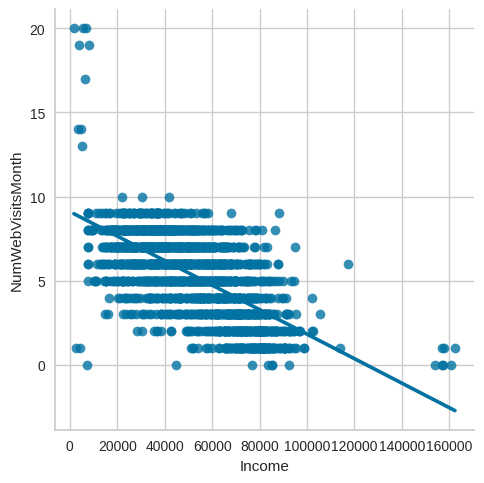

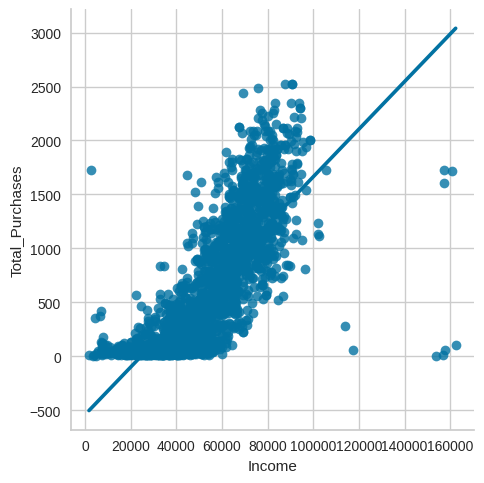

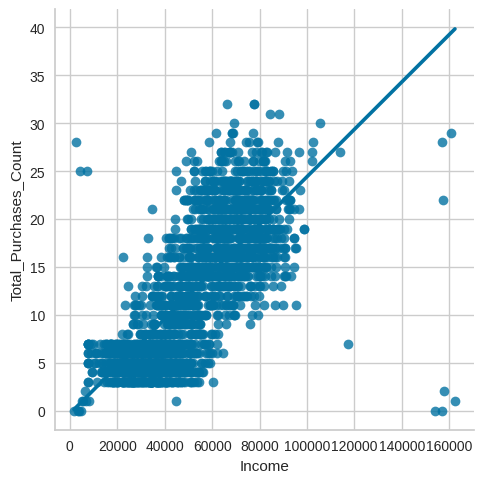

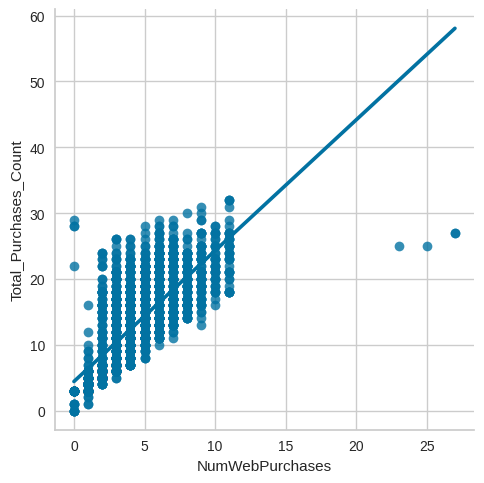

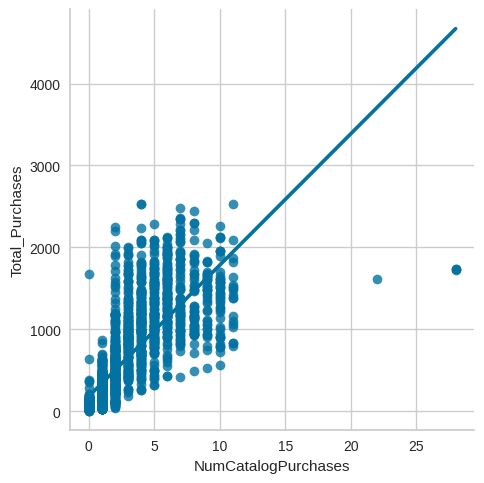

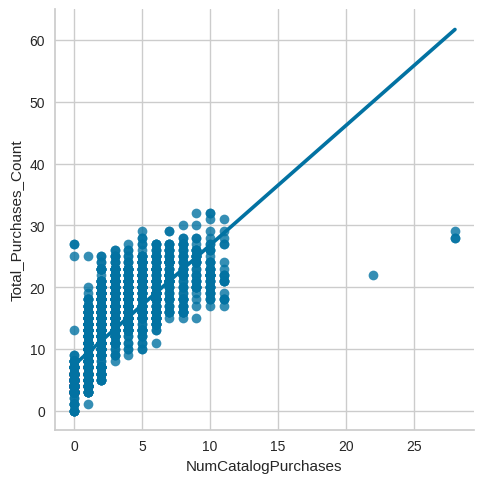

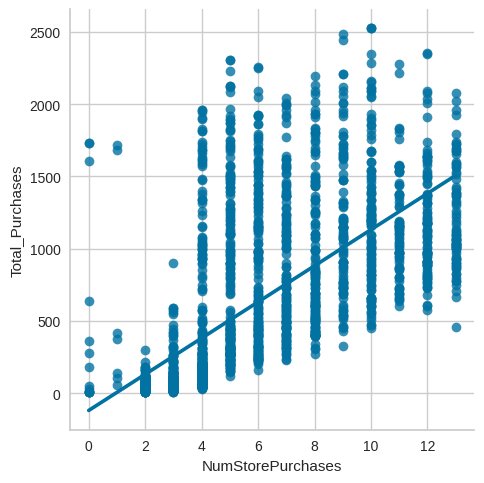

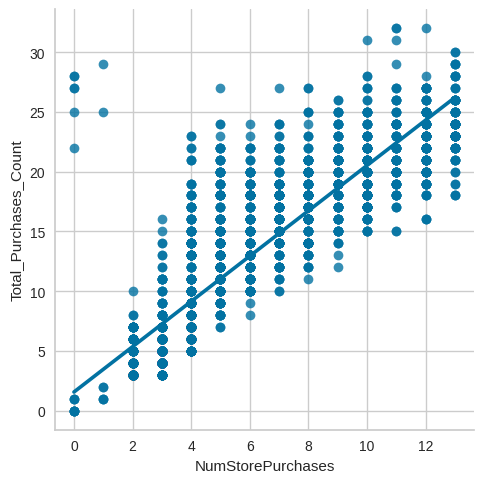

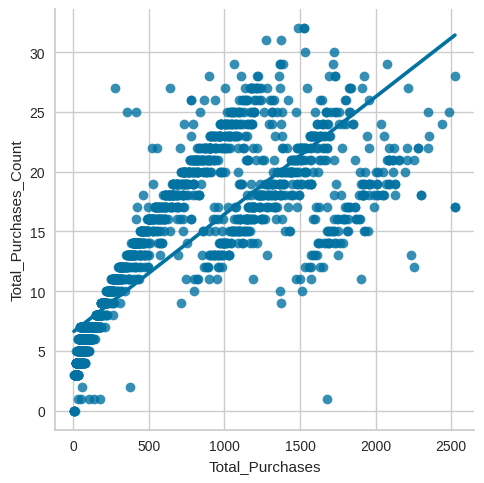

In [53]:
#visualize the high correlations
def lmplot(df,x,y, hue = None, col = None, row = None, ci = False):
  sns.lmplot(data = df, x = x, y = y, hue = hue, col = col, row = row, ci = ci)

for tup in high_correlation_tuple:
  lmplot(data, tup[0], tup[1])

The correlation between Total_Purchases_Count and Total_Purchases shows **three** distinct regression lines. This indicates that the customer base naturally segregates based on their average transaction value and that these features are important for clustering

<Axes: xlabel='Total_Purchases', ylabel='Total_Purchases_Count'>

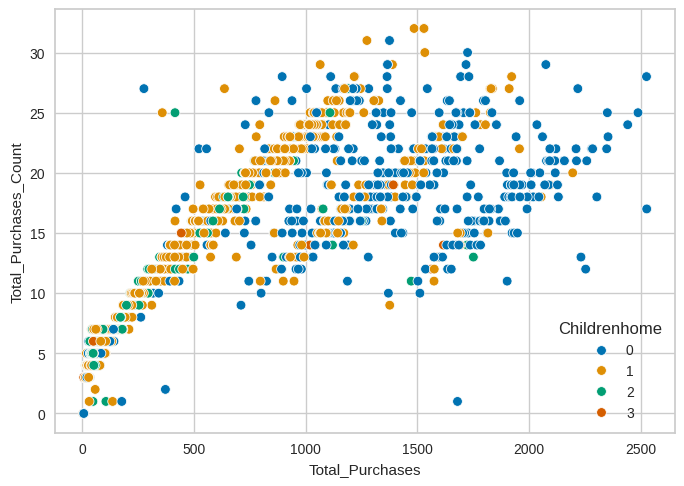

In [54]:
#check if number of children at home influences spending behavior

#Combine Kidhome andd Teenhome to simplify analysis
data['Childrenhome'] = data['Teenhome'] + data['Kidhome']
#plot
sns.scatterplot(data=data, x='Total_Purchases', y='Total_Purchases_Count', hue='Childrenhome', palette='colorblind')

#####**Observations:** Customers with more than 1 child at home tend to spend less overall. This shows children at home as a primary financial constraint and rienforces the importance of Total purchases in clustering

In [55]:
#drop Kidhome and Teenhome columns
data.drop(['Kidhome','Teenhome'], axis = 1, inplace = True)

**Scaling Variables**

In [56]:
#Select numerical columns for scaling
numerical_cols = data.select_dtypes(include=np.number).columns

#Initialize StandardScaler
scaler = StandardScaler()

# The scaled data is stored in the 'subset_scaled_df' variable for later use
data_scaled = pd.DataFrame(scaler.fit_transform(data[numerical_cols]), columns=numerical_cols)


#copy scaled data
data_for_modeling = data_scaled.copy()
data_for_modeling.head()


,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Purchases,Total_Purchases_Count,Childrenhome
0,0.287100,0.306046,0.349491,1.408311,2.513430,-0.551351,0.693003,-0.280614,-0.284311,-0.278752,-0.261574,-0.116695,-0.095066,2.392886,1.016863,1.680533,1.312606,-1.265468
1,-0.262521,-0.384991,-0.168025,-1.109798,-0.568286,-1.166165,-0.132097,-0.280614,-0.284311,-0.278752,-0.261574,-0.116695,-0.095066,-0.417905,1.273376,-0.960824,-1.184502,1.394100
2,0.915058,-0.799613,-0.685540,1.408311,-0.225873,1.293093,-0.544647,-0.280614,-0.284311,-0.278752,-0.261574,-0.116695,-0.095066,-0.417905,0.332828,0.283438,1.035150,-1.265468
3,-1.180482,-0.799613,-0.168025,-0.750068,-0.910699,-0.551351,0.280453,-0.280614,-0.284311,-0.278752,-0.261574,-0.116695,-0.095066,-0.417905,-1.291756,-0.917632,-0.907045,0.064316
4,0.294323,1.549913,1.384523,0.329121,0.116540,0.063464,-0.132097,-0.280614,-0.284311,-0.278752,-0.261574,-0.116695,-0.095066,-0.417905,-1.035242,-0.304638,0.202781,0.064316


**Applying PCA**

In [57]:
from sklearn.decomposition import PCA

#Defining the number of principal components to generate
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1)
data_pca = pd.DataFrame(pca.fit_transform(data_scaled))


#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_
data_pca.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2.658794,0.577742,0.977644,1.285173,0.016780,0.007032,0.484209,-0.196077,-1.624649,-1.017592,-2.228107,-0.990646,-0.634126,-1.322927,0.648207,-0.272337,0.262444,-8.241021e-16
1,-2.209531,-0.057741,-0.294151,-0.643199,-0.623040,1.166813,1.364743,-0.131203,0.606575,-0.071984,0.102457,0.054001,0.097921,-0.377868,0.127472,-0.038155,-0.004244,-8.106725e-17
2,1.825994,0.778468,-1.001775,0.460663,-0.805607,0.226992,-0.649049,0.700412,-1.011528,0.645251,0.245358,0.612747,0.397900,0.256628,-0.483139,0.305692,-0.349532,-1.187002e-16
3,-2.238376,-0.738694,-0.290832,0.305170,-0.546026,-0.289242,-1.096799,0.074777,0.343178,0.197900,0.201437,0.078266,-0.092882,0.175495,-0.163108,-0.260060,0.122243,-8.642065e-17
4,-0.126599,1.138717,-0.115999,-0.284190,1.094144,-1.353409,-0.432620,-0.333600,0.675494,-0.350539,-0.444318,-0.248123,0.074362,-0.054551,-0.709566,0.163508,-0.388340,3.258056e-16


Text(0, 0.5, 'Cumulative Explained Variance')

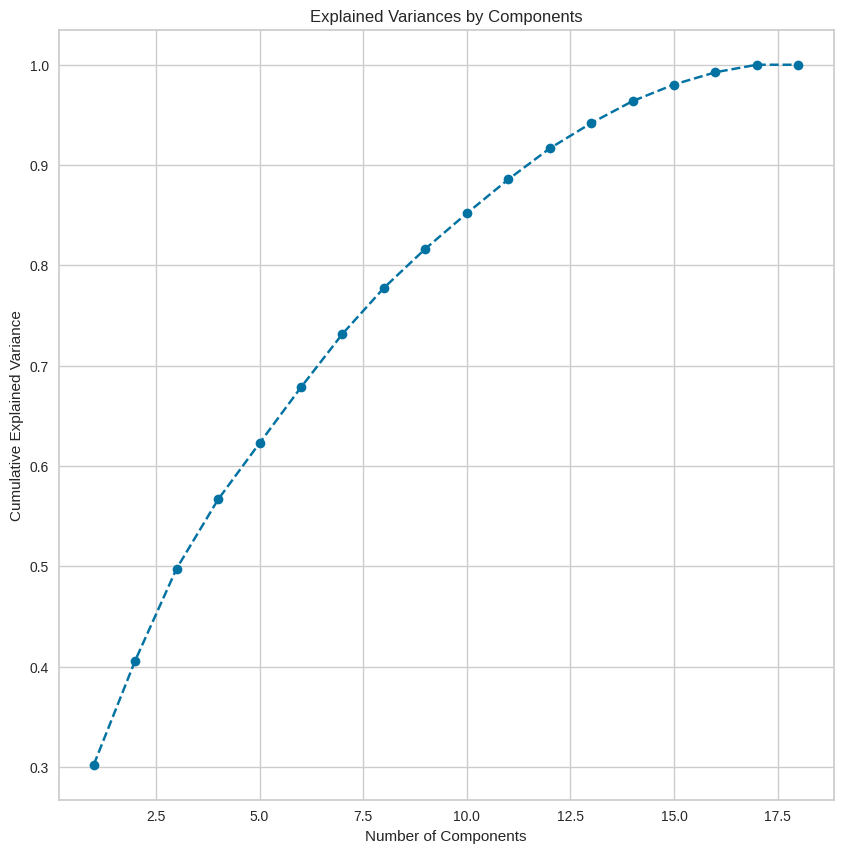

In [58]:
#PCA visualized
plt.figure(figsize = (10,10))
plt.plot(range(1,n + 1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [59]:
# find the least number of components that can explain more than 80% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.80):
    print("Number of PCs that explain at least 80% variance: ", ix+1)
    break

Number of PCs that explain at least 80% variance:  9


In [60]:
#Visualize Variability across first 9 PCs
pc_comps = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']
data_pca1 = pd.DataFrame(np.round(pca.components_[:9,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca1.T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Income,0.37,0.05,-0.11,-0.04,-0.03,0.08,0.10,-0.03,0.22
Recency,-0.00,0.09,-0.14,-0.36,0.67,-0.43,0.27,-0.15,-0.15
NumDealsPurchases,-0.04,0.47,0.42,0.02,0.02,-0.08,-0.05,-0.13,0.37
NumWebPurchases,0.25,0.34,0.23,0.11,0.02,-0.10,-0.12,-0.01,-0.38
NumCatalogPurchases,0.35,0.04,-0.05,0.13,0.07,-0.03,0.09,0.03,0.17
NumStorePurchases,0.33,0.25,-0.06,-0.03,-0.03,-0.03,-0.16,0.13,0.03
NumWebVisitsMonth,-0.26,0.11,0.42,0.03,0.05,-0.14,-0.14,-0.04,-0.34
AcceptedCmp3,0.02,-0.17,0.24,0.52,0.33,-0.13,0.41,0.27,0.00
AcceptedCmp4,0.14,-0.13,0.32,-0.51,-0.08,0.01,-0.16,-0.04,-0.24
AcceptedCmp5,0.22,-0.34,0.15,-0.14,0.06,0.02,0.02,-0.28,0.14


In [61]:
#Highlight significant variability in each PC
def color_high(val):
    if val <-0.25:
        return 'background: blue' # blue for negative variability
    elif val >0.25:
        return 'background: green' # green for positive variability

data_pca1.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Income,0.370000,0.050000,-0.110000,-0.040000,-0.030000,0.080000,0.100000,-0.030000,0.220000
Recency,-0.000000,0.090000,-0.140000,-0.360000,0.670000,-0.430000,0.270000,-0.150000,-0.150000
NumDealsPurchases,-0.040000,0.470000,0.420000,0.020000,0.020000,-0.080000,-0.050000,-0.130000,0.370000
NumWebPurchases,0.250000,0.340000,0.230000,0.110000,0.020000,-0.100000,-0.120000,-0.010000,-0.380000
NumCatalogPurchases,0.350000,0.040000,-0.050000,0.130000,0.070000,-0.030000,0.090000,0.030000,0.170000
NumStorePurchases,0.330000,0.250000,-0.060000,-0.030000,-0.030000,-0.030000,-0.160000,0.130000,0.030000
NumWebVisitsMonth,-0.260000,0.110000,0.420000,0.030000,0.050000,-0.140000,-0.140000,-0.040000,-0.340000
AcceptedCmp3,0.020000,-0.170000,0.240000,0.520000,0.330000,-0.130000,0.410000,0.270000,0.000000
AcceptedCmp4,0.140000,-0.130000,0.320000,-0.510000,-0.080000,0.010000,-0.160000,-0.040000,-0.240000
AcceptedCmp5,0.220000,-0.340000,0.150000,-0.140000,0.060000,0.020000,0.020000,-0.280000,0.140000


- For PC1, Total_Purchases, Total_Purchases_Count, and Income have the highest loadings, representing customer wealth and engagement.
- This aligns with previous analysis that saw customers clearly segregated by overall purchase amount and frequency.


## **K-means Clustering**

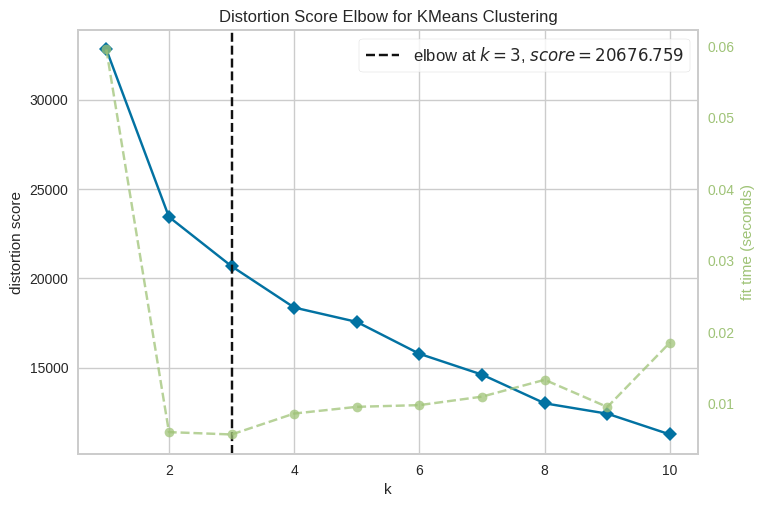

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
# Elbow Method
model = KMeans(random_state=1, n_init='auto')
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(data_pca.iloc[:,:9])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

##### **Observations:** According to this graph, k = 3 is the best choice as gain significantly decreases after 3

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

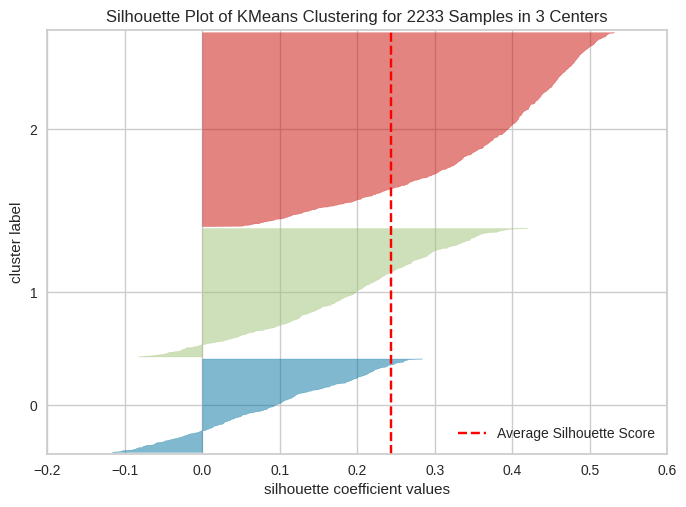

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2233 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [63]:
# Silhouette Score
model = KMeans(n_clusters=3, random_state=1, n_init='auto') # Using k=3 based on Elbow plot
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(data_pca.iloc[:, :9])        # Fit the data to the visualizer using only the first 9 columns
visualizer.show()        # Finalize and render the figure

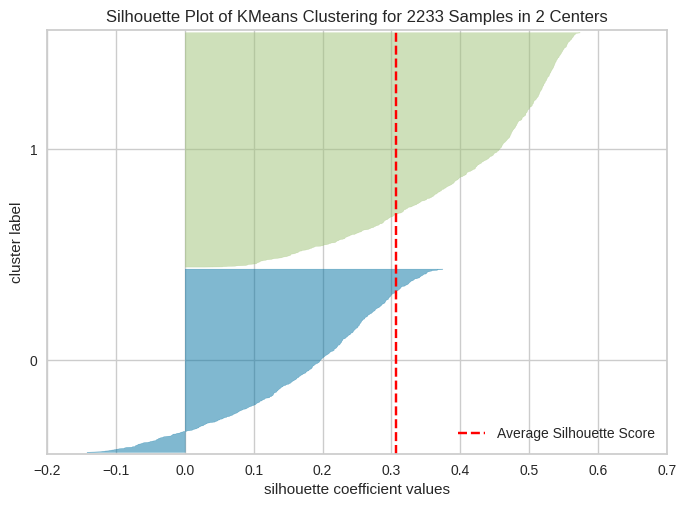

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2233 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [64]:
# Silhouette Score
model = KMeans(n_clusters=2, random_state=1, n_init='auto') # Using k=2 for comparison
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

# Fit the data to the visualizer using only the first 8 columns
visualizer.fit(data_pca.iloc[:, :9])
visualizer.show()        # Finalize and render the figure

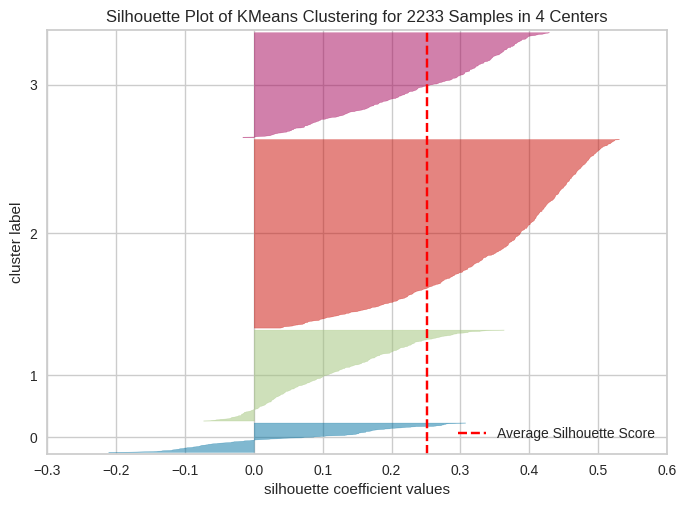

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2233 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [65]:
# Silhouette Score
model = KMeans(n_clusters=4, random_state=1, n_init='auto') # Using k=4 for comparison
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(data_pca.iloc[:, :9])        # Fit the data to the visualizer using only the first 9 columns
visualizer.show()        # Finalize and render the figure

##### **Observations:** According to the silhouetter score, k = 2 gives the highest score and is an optimal number. However the elbow test says k = 3 is the optimal number, which matches the correlation graph between Total_Purchases and Total_Purchases_Count.

In [66]:
#Fit data to kmeans using ideal number of clusters (k = 3)
kmeans = KMeans(n_clusters=3, max_iter= 1000, random_state=1)
kmeans.fit(data_scaled)

#Adding predicted labels to the original data and scaled data
data_for_modeling['Labels'] = kmeans.predict(data_scaled)
data['Labels'] = kmeans.predict(data_scaled)

In [67]:
data.Labels.value_counts()

,count
Labels,
1,1045
2,691
0,497


In [68]:
# Calculating summary statistics of the original data for each label for numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns
mean = data.groupby('Labels')[numeric_cols].mean()
median = data.groupby('Labels')[numeric_cols].median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = [f'group_{i} Mean' for i in range(len(mean))] + [f'group_{i} Median' for i in range(len(median))]
display(df_kmeans.T)

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Income,77845.812503,35102.722637,58890.828694,77882.0,34600.0,59432.0
Recency,50.525151,49.464115,47.661360,54.0,49.0,49.0
NumDealsPurchases,1.132797,2.027751,3.630970,1.0,2.0,3.0
NumWebPurchases,4.873239,2.107177,6.509407,5.0,2.0,6.0
NumCatalogPurchases,6.225352,0.560766,3.269175,6.0,0.0,3.0
NumStorePurchases,8.227364,3.200000,7.965268,8.0,3.0,8.0
NumWebVisitsMonth,2.641851,6.443062,5.548480,2.0,7.0,6.0
AcceptedCmp3,0.094567,0.072727,0.057887,0.0,0.0,0.0
AcceptedCmp4,0.171026,0.007656,0.107091,0.0,0.0,0.0
AcceptedCmp5,0.321932,0.000000,0.001447,0.0,0.0,0.0


## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

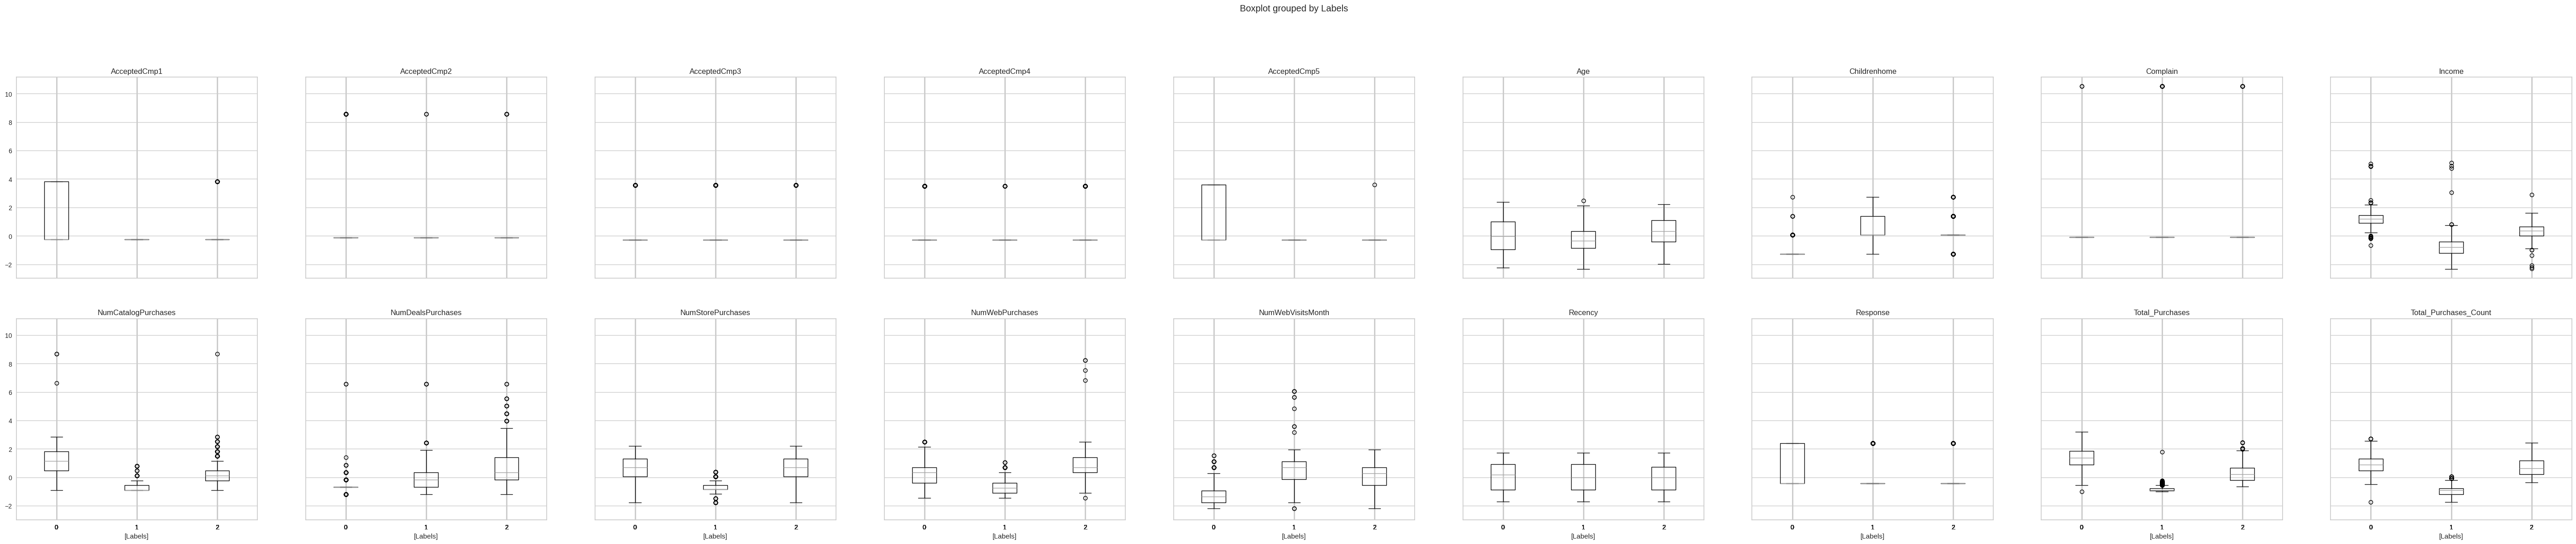

In [69]:
#Visualizing different features w.r.t K-means labels
data_for_modeling.boxplot(by = 'Labels', layout = (3,9),figsize=(70,20))
plt.show()

##### **Observations:**
* Cluster 0 represents a majority of middle age, high income customers, who typically have no children/teens at home. These customers spend the most, and make the most purchases through the catalog. This group makes the least number of deal purchases and spends the least amount of time on the website a month. This group also has the highest frequency of acceptances for campaigns, particularly campaign 1, campaign 5 and response.

* cluster 1 represents a majority of younger, low income customers who often have atleast one child and/or teen at home. These customers spend the least  and make the least number of purchases across all mediums. This group, however, makes the most web visits in a month

* cluster 2 represents a majority of older, middle income customers, who typically only have one child or teen at home. These customers make the most deal purchases and make the most website purchases. This group is also equal with group 1 on number of store purchases.

## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

* Cluster 2 represents a group of customers who are motivated by deals and do most of their purchases online:
  - Consider increasing digital deal visibility and use promotional emails/pop ups specifically for online purchases.
  - introduce BOGO deals or 'spend $X save %X' to encourage higher spending.
* Cluster 1 represents a group of customers who spend the least but make the most web visits:
  - For this behavior, further analysis on why high web visits aren't converting to purchases( inventory, pricing.shipping costs, etc.) would be benificial.
  - to encourage first-time purchases and repeat website visits, offer loyalty points or exclusive flash sales.
  - Promote lower-priced or smaller-sized products to make deals more accesible to low-income customers.
* Cluster 0 represents the highest spending customers who make most purchases without deals:
  - The biggest focus should be on retention and exclusivity.
  - invest in high-quality, personalized catalogs and in-store experiences as these are this groups preffered channel for purchases.
  - offer exclusive perks like early access, exclusive products or a high-tier loyalty program.
  - Since this group make the least amount of deal purchases, avoid sending discount emails to encourage higher spending and preserve a premium brand image.